In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tqdm import tqdm
from sklearn.compose import make_column_selector, make_column_transformer
import numpy as np

In [13]:
df = pd.read_csv('Glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [17]:
X,y = df.drop('Type', axis=1), df['Type']
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state=24)

In [30]:
max_depths = [2,3,4,None]
min_sample_split = [2,10,50]
min_sample_leaf = [1,50,50]
scores = []
for i in tqdm(range(len(max_depths))):
    for j in tqdm(range(len(min_sample_split))):
        for k in tqdm(range(len(min_sample_leaf))):
            td = DecisionTreeClassifier(random_state=24,max_depth=max_depths[i],min_samples_split=min_sample_split[j], min_samples_leaf=min_sample_leaf[k])
            td.fit(X_train,Y_train)
            y_pred = td.predict(X_test)
            scores.append([max_depths[i],min_sample_split[j],min_sample_leaf[k],accuracy_score(Y_test,y_pred)])
df_res = pd.DataFrame(scores, columns = ['max_depth', 'Split','leaf','accuracy'])
df_res.sort_values('accuracy', ascending= False).iloc[0]  

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 272.42it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 273.42it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 72.54it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 300.57it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 334.13it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 79.16it/s]

  0%|                       

max_depth          NaN
Split        10.000000
leaf          1.000000
accuracy      0.676923
Name: 30, dtype: float64

In [32]:
test = pd.read_csv('tst_Glass.csv')

In [26]:
from sklearn.pipeline import Pipeline

ohe = OneHotEncoder(sparse_output=False, drop= 'first').set_output(transform='pandas')
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)),
                            ("passthrough", make_column_selector(dtype_exclude=object)),
                            verbose_feature_names_out=False).set_output(transform='pandas')

DT= DecisionTreeClassifier(random_state=24,max_depth=None,min_samples_split=10, min_samples_leaf=1)
pipe = Pipeline([('Tree', DT)])
pipe.fit(X, y)
y_pred = pipe.predict(test)

In [28]:
y_pred

array(['headlamps', 'building_windows_float_processed',
       'building_windows_float_processed', 'headlamps', 'headlamps',
       'building_windows_non_float_processed'], dtype=object)

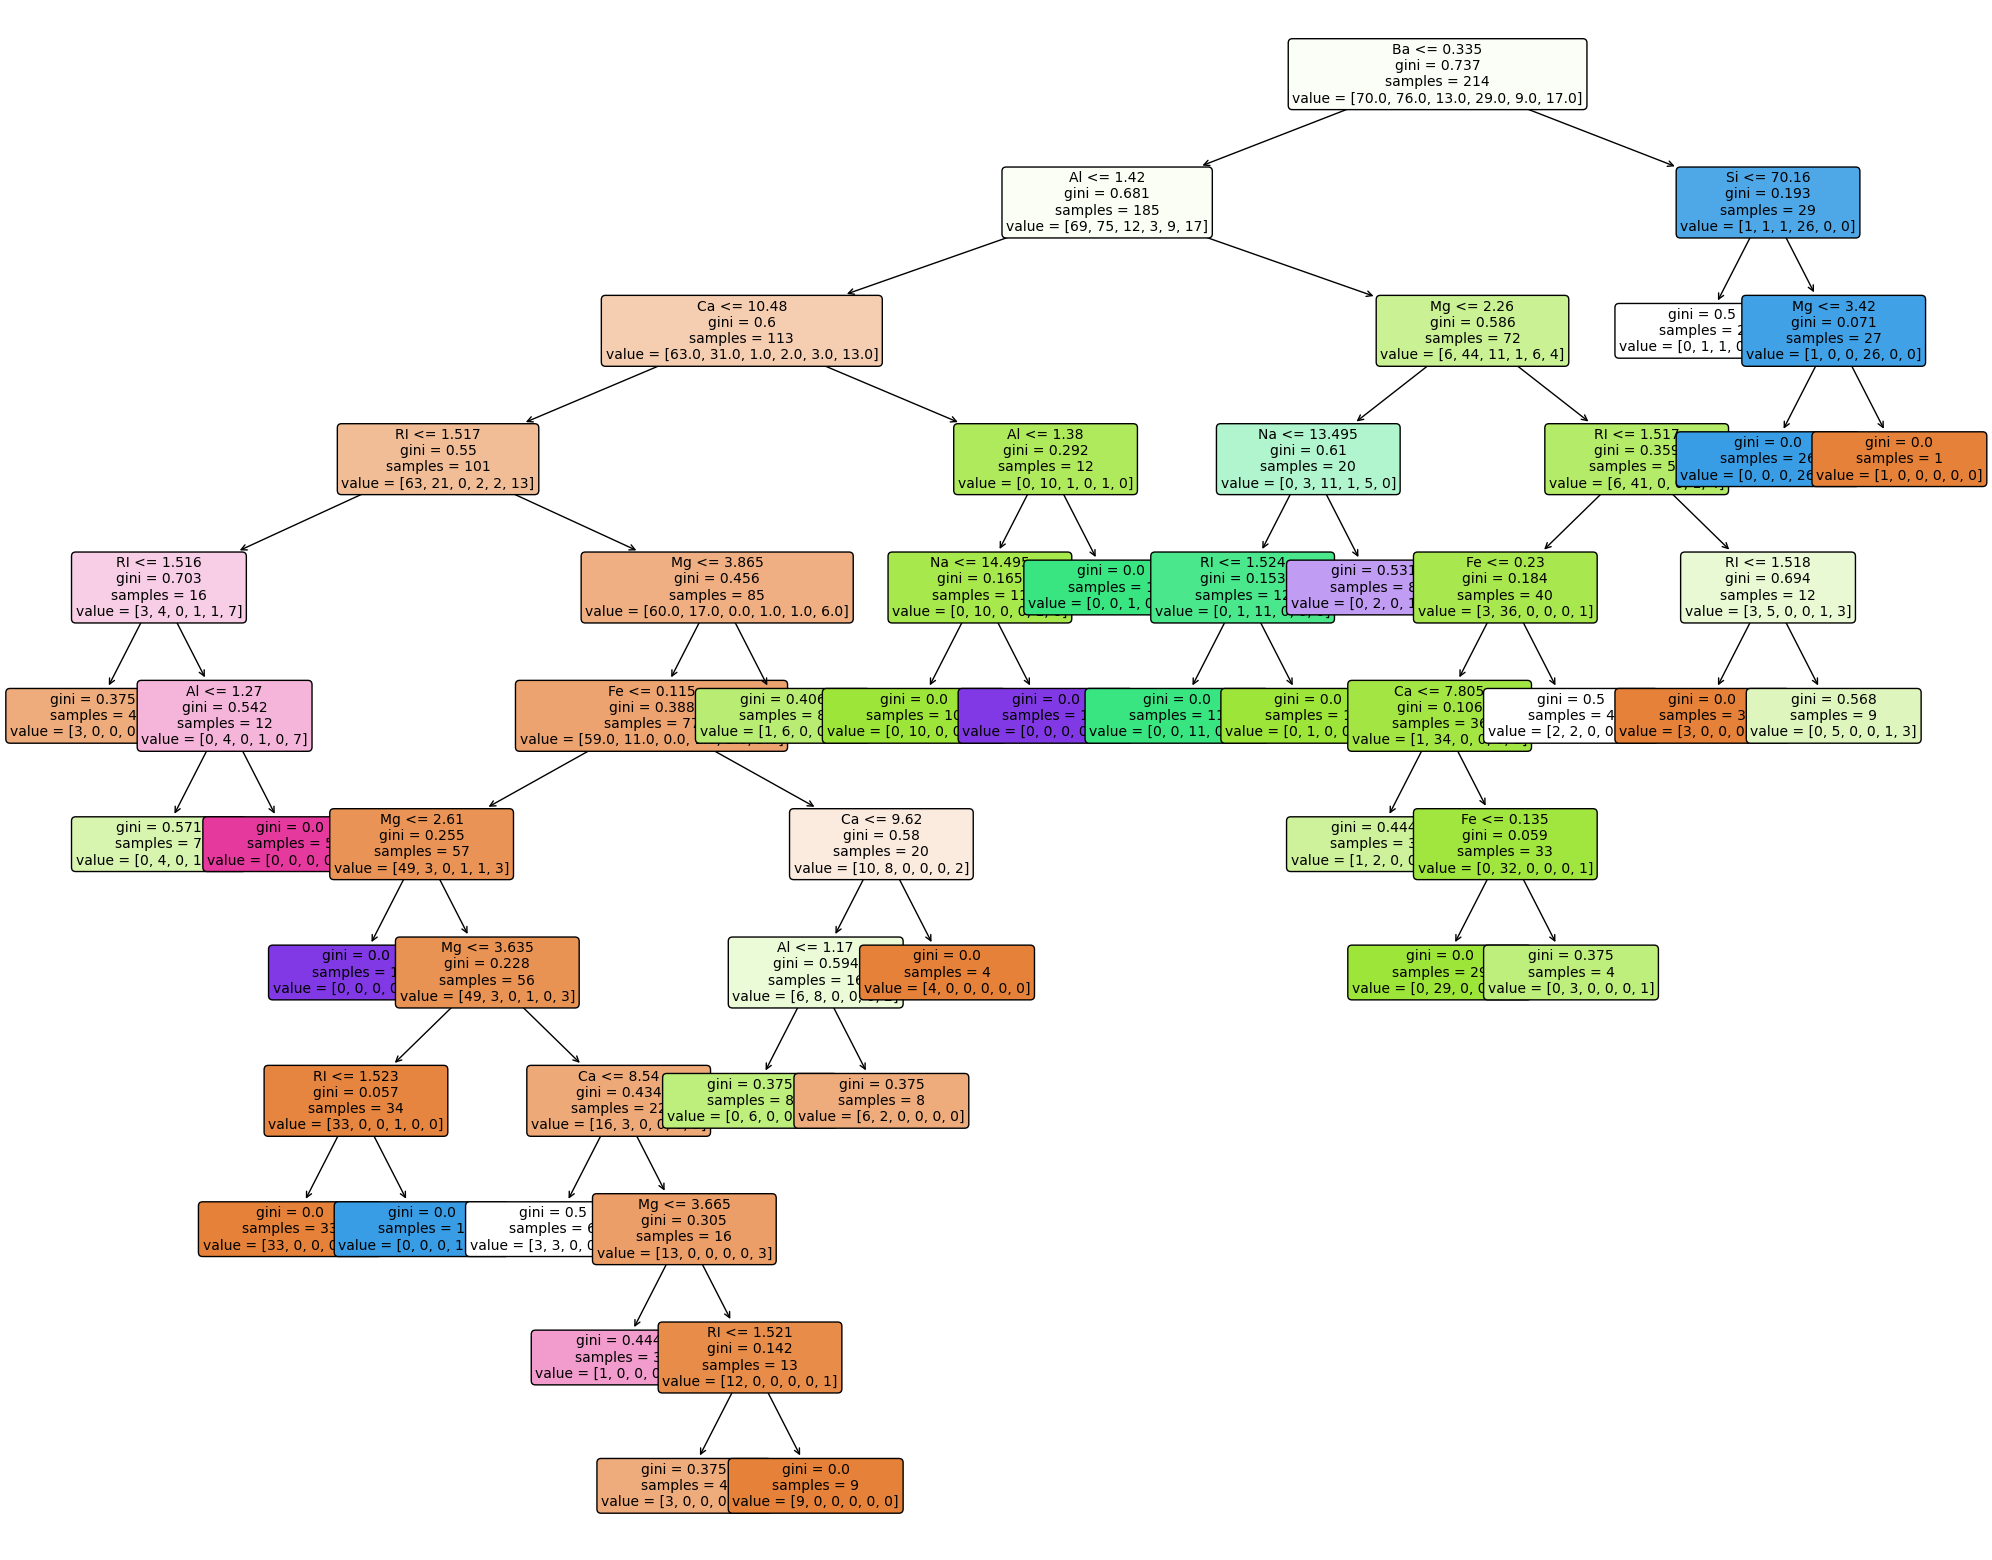

In [36]:
import matplotlib.pyplot as plt


plt.figure(figsize=(25, 20))
plot_tree(
    DT, 
    feature_names=list(X.columns),  # Corrected list syntax
               # Assuming these are the correct class names
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [40]:
np.sum(DT.feature_importances_)

0.9999999999999999

In [54]:
# most important features 
df_imp = pd.DataFrame({'Importance' : DT.feature_importances_,'Column': list(X.columns)})
df_imp

,Importance,Column
0,0.156684,RI
1,0.065101,Na
2,0.194293,Mg
3,0.194999,Al
4,0.021826,Si
5,0.000000,K
6,0.106650,Ca
7,0.213683,Ba
8,0.046764,Fe


In [56]:
df_imp.sort_values( 'Importance' , ascending=False, inplace=True)

Text(0.5, 1.0, 'Features Importance')

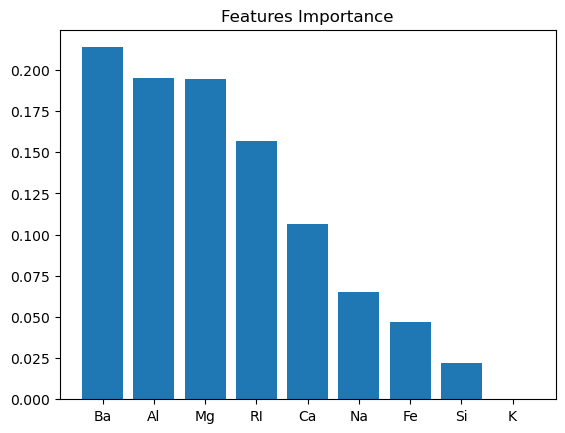

In [58]:
plt.bar(df_imp['Column'], df_imp['Importance'])
plt.title('Features Importance')